In [ ]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Many deep learning models, especially convolutional neural networks (CNNs), 
# expect input data to have a shape of (height, width, channels).
# By adding a channel dimension with np.expand_dims(..., axis=-1), 
# we're effectively converting the grayscale images into single-channel images, 
# which is the format that many CNN models expect.

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [10]:
encoder = models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                             layers.Conv2D(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2D(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Flatten(),
                             layers.Dense(64, activation='relu')])

encoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         200,768 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
decoder = models.Sequential([layers.InputLayer(input_shape=(64,)), 
                             layers.Dense(7*7*64, activation='relu'),
                            layers.Reshape((7,7,64)),
                            layers.Conv2DTranspose(64, (3,3), activation='relu', strides=2, padding='same'),
                            layers.Conv2DTranspose(32, (3,3), activation= 'relu', strides =2, padding='same'),
                            layers.Conv2DTranspose(1, (3,3), activation='sigmoid', padding='same')])
     
    
decoder.summary()
                        

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3136)                │         203,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.summary()  

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 64)                  │         219,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28, 1)           │         259,521 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test,x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.1483 - val_loss: 0.0743
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0734 - val_loss: 0.0709
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.0706 - val_loss: 0.0696
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 0.0696 - val_loss: 0.0687
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.0689 - val_loss: 0.0682
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 0.0685 - val_loss: 0.0678
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 0.0680 - val_loss: 0.0675
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0678 - val_loss: 0.0675
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0676 - val_loss: 0.0669
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0671 - val_loss: 0.0669


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


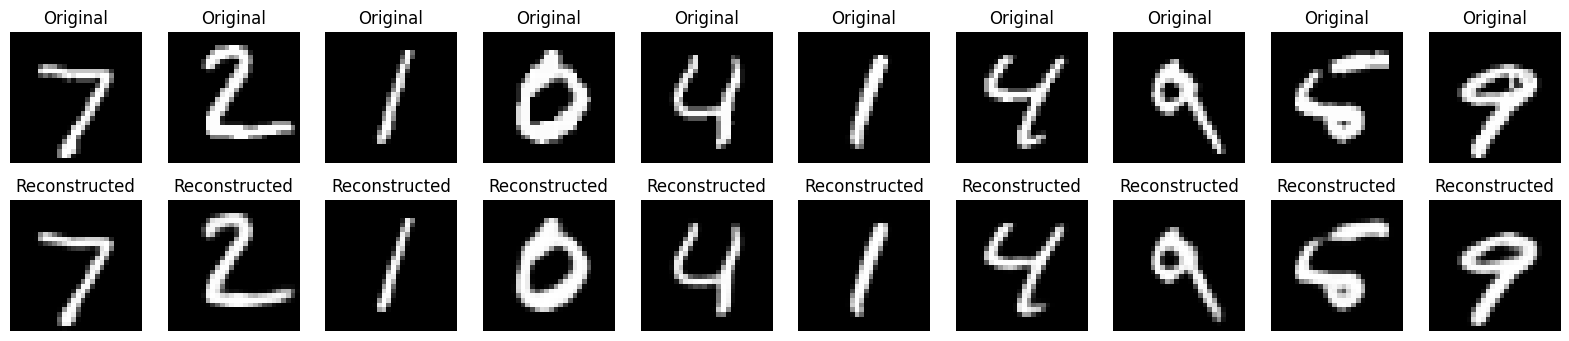

In [18]:
decoded_images = autoencoder.predict(x_test)

count =10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title("Original")
    plt.gray()
    ax.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28), cmap="gray")
    plt.title("Reconstructed")
    plt.gray()
    ax.axis('off')

plt.show()